# BMIF 201 Problem Set 1
### Michelle M. Li

## Question 1

Let the entropy be
$$J(x) = -\sum_{i}(1 - p_i) log(1-p_i)$$

The partial derivatives are
$$\frac{\partial J(x)}{\partial x_i} = \frac{1}{N}(log(1 - \frac{x_i}{N}) + 1)$$
$$\frac{\partial^2 J(x)}{\partial^2 x_i^2} = \frac{-1}{N^2 - Nx_i}$$

Now, we can calculate the change in entropy over one time step (i.e. from generation $t$ to generation $t + 1$). First, let us denote the change in $x$ through one generation by $\Delta x$. Using the Taylor Expansion with degree 2 to approximate $\left< J(x + \Delta x) \right>$,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) + \sum^k_i \frac{\partial J(x)}{\partial x_i} \Delta x_i + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial x_i \partial x_j} \Delta x_i \Delta x_j \right>$$

Applying the linearity of expectations property, 

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \sum^k_i \frac{\partial J(x)}{\partial x_i} \left< \Delta x_i \right> + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial x_i \partial x_j} \left< \Delta x_i \Delta x_j \right>$$

Because $\left< \Delta x \right> = 0$,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial x_i \partial x_j} \left< \Delta x_i \Delta x_j \right>$$

Suppose $i = j$,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial^2 x_i^2} \left< \Delta x_i^2 \right>$$

Substituting in the partial derivatives from above,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \frac{1}{2}\sum^k_{i = 1} \frac{-1}{N^2 - Nx_i} \left< \Delta x_i^2 \right>$$

Since this is a multinomial distribution, we know that the variance is $N(\frac{x_i}{N})(1 - \frac{x_i}{N})$, which we can substitute in

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2}\sum^k_{i = 1} \frac{1}{N^2 - Nx_i} \left( N(\frac{x_i}{N})(1 - \frac{x_i}{N}) \right)$$

Multiplying the terms and factoring out $N$,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2}\sum^k_{i = 1} \frac{x_i(N - x_i)}{N(N - x_i)}$$

We can cancel out $N - x_i$ to get

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2}\sum^k_{i = 1} \frac{x_i}{N}$$

Using $\sum^k_{i = 1} x_i = N$ to simplify the expression,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2N}$$

So, the expected change in Shannon entropy from generation $t$ to generation $t + 1$ is

$$\left< \Delta J(x) \right> = \left< J(x + \Delta x) \right> - J(x) = \frac{-1}{2N}$$

To calculate the fixation time $T$, we start by stating that

$$J(x) - T \left< \Delta J(x) \right> = 0$$

which can be simplified into 

$$T = \frac{J(x)}{\left< \Delta J(x) \right>}$$

Finally,
$$T = 2NJ(x)$$

## Question 2

### Part (a)

In [628]:
import numpy
import scipy
import matplotlib.pyplot as plt
from collections import defaultdict

In [629]:
#Simulation Function
def wf_sim(n, p_init, n_sim):
    simulations = []
    times_to_fixation = []
    for s in range(n_sim):
        p = p_init
        total_n_A = []
        fixated = False
        i = 0 #Generation
        while (fixated == False):
            curr_n_A = numpy.random.binomial(n, p)
            total_n_A.append(curr_n_A)
            p = curr_n_A/n
            i += 1
            if (p == 1 or p == 0) & (fixated == False): 
                times_to_fixation.append(i)
                fixated = True
        simulations.append(total_n_A)
    return(simulations, times_to_fixation)

#Calculate expectations and variances
def wf_sim_expvar(curr_n, list_p, n_sim):
    expectations = []
    variances = []
    for curr_p in list_p:
        simulations, times_to_fixation = wf_sim(curr_n, curr_p, n_sim)
        expectations.append(numpy.mean(times_to_fixation))
        variances.append(numpy.var(times_to_fixation))
    return expectations, variances

### Numerically approximate the **variance** in fixation times as a function of population size for a biallelic locus with $p = 0.5$

In [630]:
variances = []
n_pop = [10, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]
for n_curr in n_pop:
    #Simulate
    simulations, times_to_fixation = wf_sim(n = n_curr, p_init = 0.5, n_sim = 1000)
    #Observed variance to fixation
    variances.append(numpy.var(times_to_fixation))
variances

[96.59047899999999,
 10565.068416000002,
 67793.7899,
 255156.45397499998,
 489774.42735899996,
 984445.7074789999,
 6333480.768123999,
 23964609.991471,
 52427964.349984,
 106793241.00191098]

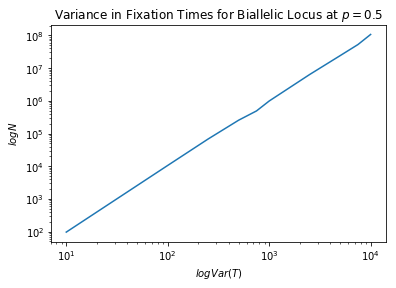

In [631]:
#Variances
plt.loglog(n_pop, numpy.array(variances).T)
plt.xlabel("$log Var(T)$")
plt.ylabel("$log N$")
plt.title("Variance in Fixation Times for Biallelic Locus at $p = 0.5$")
plt.show()

In this log-log plot, the slope $m = 2$ and so the variance is $$Var(T) = N^2$$
where $T$ is the time to fixation for a given population size $N$ and starting allele frequency $p = 0.5$.

### Simulations

In [632]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 2000

In [633]:
#Run N = 10 simulation
expectations_N10, variances_N10 = wf_sim_expvar(curr_n = 10, list_p = p, n_sim = n_sim)

In [634]:
#Run N = 50 simulation
expectations_N50, variances_N50 = wf_sim_expvar(curr_n = 50, list_p = p, n_sim = n_sim)

In [635]:
#Run N = 100 simulation
expectations_N100, variances_N100 = wf_sim_expvar(curr_n = 100, list_p = p, n_sim = n_sim)

In [636]:
#Run N = 500 simulation
expectations_N500, variances_N500 = wf_sim_expvar(curr_n = 500, list_p = p, n_sim = n_sim)

In [637]:
#Run N = 1000 simulation
expectations_N1000, variances_N1000 = wf_sim_expvar(curr_n = 1000, list_p = p, n_sim = n_sim)

In [638]:
#Run N = 2500 simulation
expectations_N2500, variances_N2500 = wf_sim_expvar(curr_n = 2500, list_p = p, n_sim = n_sim)

In [639]:
#Run N = 5000 simulation
expectations_N5000, variances_N5000 = wf_sim_expvar(curr_n = 5000, list_p = p, n_sim = n_sim)

In [640]:
#Run N = 10000 simulation
expectations_N10000, variances_N10000 = wf_sim_expvar(curr_n = 10000, list_p = p, n_sim = n_sim)

### **Interpretation:** Variance in fixation time as a function of starting allele frequency

The variance in fixation time for a given population as a function of the starting allele frequency is quadratic, but scaled on the y-axis by some constant $b$. The constant $b$ is a function of the population size.

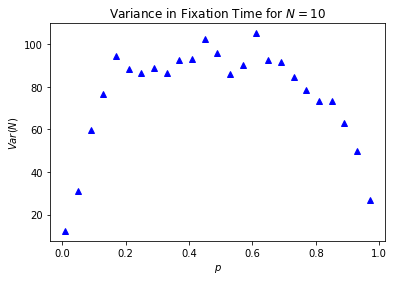

In [659]:
#Variances at N = 10
plt.plot(p, numpy.array(variances_N10).T, 'b^')
plt.title("Variance in Fixation Time for $N = 10$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

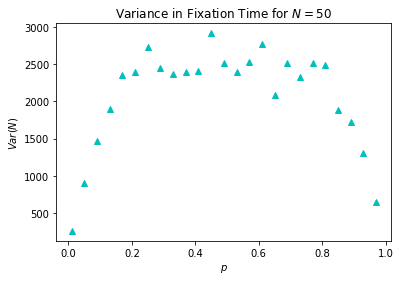

In [660]:
#Variances at N = 50
plt.plot(p, numpy.array(variances_N50).T, 'c^')
plt.title("Variance in Fixation Time for $N = 50$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

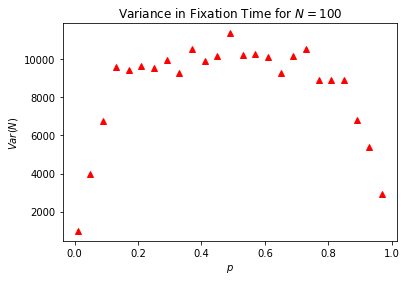

In [661]:
#Variances at N = 100
plt.plot(p, numpy.array(variances_N100).T, 'r^')
plt.title("Variance in Fixation Time for $N = 100$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

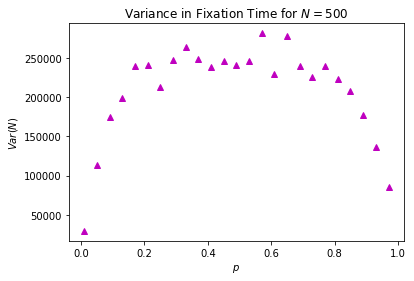

In [662]:
#Variances at N = 500
plt.plot(p, numpy.array(variances_N500).T, 'm^')
plt.title("Variance in Fixation Time for $N = 500$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

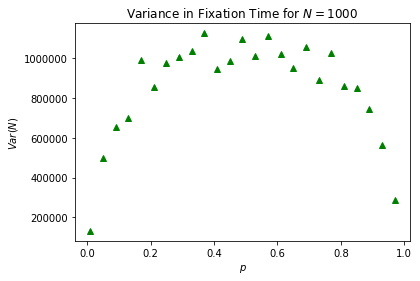

In [663]:
#Variances at N = 1000
plt.plot(p, numpy.array(variances_N1000).T, 'g^')
plt.title("Variance in Fixation Time for $N = 1000$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

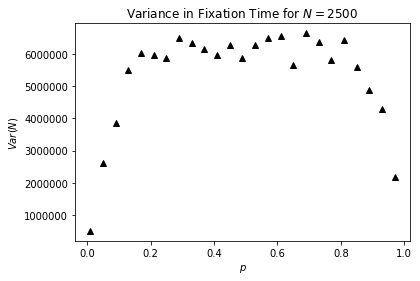

In [664]:
#Variances at N = 2500
plt.plot(p, numpy.array(variances_N2500).T, 'k^')
plt.title("Variance in Fixation Time for $N = 2500$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

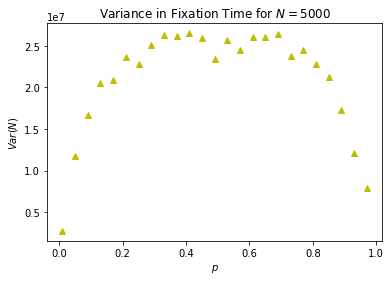

In [665]:
#Variances at N = 5000
plt.plot(p, numpy.array(variances_N5000).T, 'y^')
plt.title("Variance in Fixation Time for $N = 5000$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

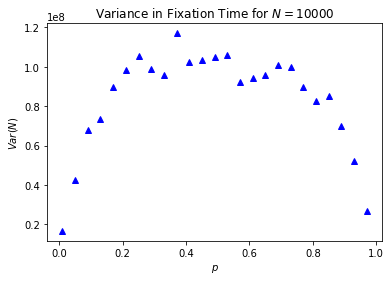

In [666]:
#Variances at N = 10000
plt.plot(p, numpy.array(variances_N10000).T, 'b^')
plt.title("Variance in Fixation Time for $N = 10000$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

### **Interpretation:** Expected fixation time as a function of starting allele frequency

Similar to variance, the expected fixation time for a given population as a function of the starting allele frequency is quadratic, but scaled on the y-axis by some constant $c$ (due to the linearity of expectation). The constant $c$ is a function of the population size.

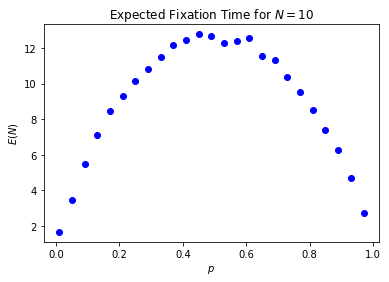

In [667]:
#Expectations at N = 10
plt.plot(p, numpy.array(expectations_N10).T, 'bo')
plt.title("Expected Fixation Time for $N = 10$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

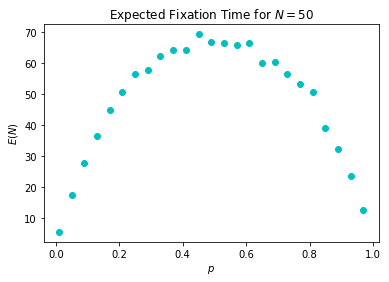

In [668]:
#Expectations at N = 50
plt.plot(p, numpy.array(expectations_N50).T, 'co')
plt.title("Expected Fixation Time for $N = 50$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

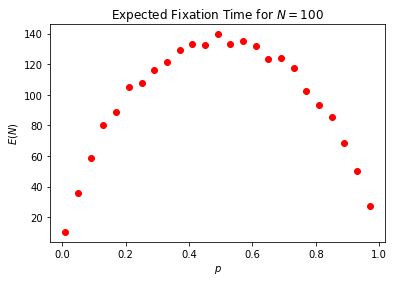

In [669]:
#Expectations at N = 100
plt.plot(p, numpy.array(expectations_N100).T, 'ro')
plt.title("Expected Fixation Time for $N = 100$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

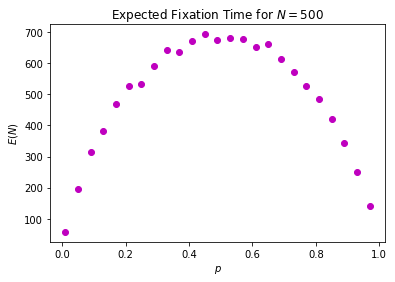

In [670]:
#Expectations at N = 500
plt.plot(p, numpy.array(expectations_N500).T, 'mo')
plt.title("Expected Fixation Time for $N = 500$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

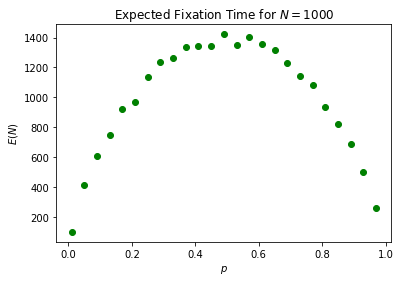

In [671]:
#Expectations at N = 1000
plt.plot(p, numpy.array(expectations_N1000).T, 'go')
plt.title("Expected Fixation Time for $N = 1000$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

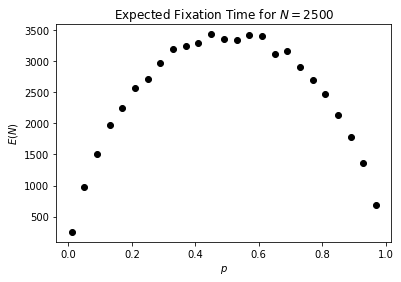

In [672]:
#Expectations at N = 2500
plt.plot(p, numpy.array(expectations_N2500).T, 'ko')
plt.title("Expected Fixation Time for $N = 2500$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

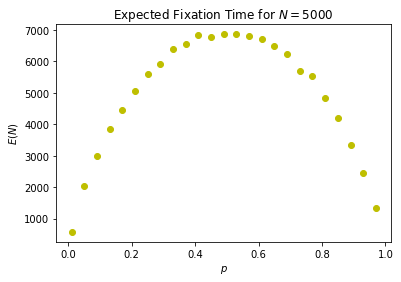

In [673]:
#Expectations at N = 5000
plt.plot(p, numpy.array(expectations_N5000).T, 'yo')
plt.title("Expected Fixation Time for $N = 5000$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

## Part (b)

In [72]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 1000
t = 1000

In [73]:
#Simulation Function
def wf_sim_ext(n, p_init, n_sim):
    total_fix_count = 0
    times_to_extinction = []
    for s in range(n_sim):
        p = p_init
        fixated = False
        i = 1 #Generation
        while (fixated == False):
            curr_n_A = numpy.random.binomial(n, p)
            p = curr_n_A/n
            if (p == 1) & (fixated == False): 
                total_fix_count += 1
                fixated = True
            if (p == 0) & (fixated == False): 
                times_to_extinction.append(i)
                total_fix_count += 1
                fixated = True
            i += 1
    return(times_to_extinction, total_fix_count)

#Calculate expectations and variances
def wf_sim_exp_ext(curr_n, list_p, n_sim):
    expectations = []
    extinction_freq = []
    for curr_p in list_p:
        times_to_extinction, total_fix_count = wf_sim_ext(curr_n, curr_p, n_sim)
        expectations.append(numpy.mean(times_to_extinction))
        extinction_freq.append(len(times_to_extinction)/total_fix_count)
    return expectations, extinction_freq

In [74]:
#Run N = 10 simulation
expectations_N10_ext, extinction_freq_N10 = wf_sim_exp_ext(curr_n = 10, list_p = p, n_sim = n_sim)

In [75]:
#Run N = 50 simulation
expectations_N50_ext, extinction_freq_N50 = wf_sim_exp_ext(curr_n = 50, list_p = p, n_sim = n_sim)

In [76]:
#Run N = 100 simulation
expectations_N100_ext, extinction_freq_N100 = wf_sim_exp_ext(curr_n = 100, list_p = p, n_sim = n_sim)

In [77]:
#Run N = 500 simulation
expectations_N500_ext, extinction_freq_N500 = wf_sim_exp_ext(curr_n = 500, list_p = p, n_sim = n_sim)

In [78]:
#Run N = 1000 simulation
expectations_N1000_ext, extinction_freq_N1000 = wf_sim_exp_ext(curr_n = 1000, list_p = p, n_sim = n_sim)

In [79]:
#Run N = 1500 simulation
expectations_N1500_ext, extinction_freq_N1500 = wf_sim_exp_ext(curr_n = 1500, list_p = p, n_sim = n_sim)

In [80]:
#Run N = 2500 simulation
expectations_N2500_ext, extinction_freq_N2500 = wf_sim_exp_ext(curr_n = 2500, list_p = p, n_sim = n_sim)

In [81]:
#Run N = 5000 simulation
expectations_N5000_ext, extinction_freq_N5000 = wf_sim_exp_ext(curr_n = 5000, list_p = p, n_sim = n_sim)

In [82]:
#Run N = 10000 simulation
expectations_N10000_ext, extinction_freq_N10000 = wf_sim_exp_ext(curr_n = 10000, list_p = p, n_sim = n_sim)

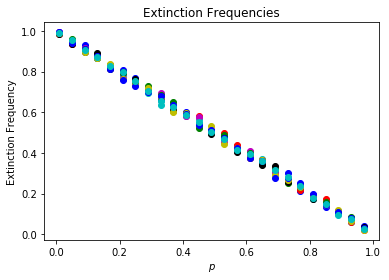

In [674]:
#Extinction Frequencies
plt.plot(p, numpy.array(extinction_freq_N10).T, 'bo',
         p, numpy.array(extinction_freq_N50).T, 'co',
         p, numpy.array(extinction_freq_N100).T, 'ro',
         p, numpy.array(extinction_freq_N500).T, 'mo',
         p, numpy.array(extinction_freq_N1000).T, 'go',
         p, numpy.array(extinction_freq_N1500).T, 'ko',
         p, numpy.array(extinction_freq_N2500).T, 'yo',
         p, numpy.array(extinction_freq_N5000).T, 'bo',
         p, numpy.array(extinction_freq_N10000).T, 'co')
plt.title("Extinction Frequencies")
plt.xlabel("$p$")
plt.ylabel("Extinction Frequency")
plt.show()

The probability of extinction $$p_{ext} = 1 - p$$
where $p$ is the allelic frequency. This is consistent with the observed results above.

### **Interpretation:** Expected time to extinction as a function of starting allele frequency

In [607]:
def exp_t_fix(p_list, n):
    expected_t_fix = []
    for p in p_list:
        t_fix = 2*n*(-p*numpy.log(p) - (1 - p)*numpy.log(1 - p))
        expected_t_fix.append(t_fix)
    return expected_t_fix

In [625]:
def obs_t_fix(p_list, m, n, c):
    observed_t_fix = []
    for p in p_list:
        t_fix = numpy.exp(c)*(n*p)**m
        observed_t_fix.append(t_fix)
    return observed_t_fix

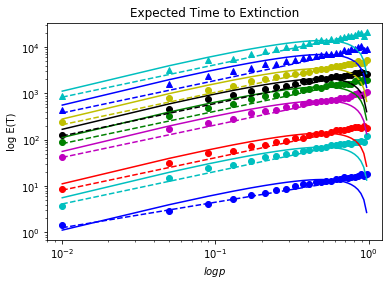

In [656]:
plt.loglog(p, numpy.array(expectations_N10_ext).T, 'bo',
           p, numpy.array(expectations_N50_ext).T, 'co',
           p, numpy.array(expectations_N100_ext).T, 'ro',
           p, numpy.array(expectations_N500_ext).T, 'mo',
           p, numpy.array(expectations_N1000_ext).T, 'go',
           p, numpy.array(expectations_N1500_ext).T, 'ko',
           p, numpy.array(expectations_N2500_ext).T, 'yo',
           p, numpy.array(expectations_N5000_ext).T, 'b^',
           p, numpy.array(expectations_N10000_ext).T, 'c^',
         
           p, exp_t_fix(p, 10), 'b',
           p, exp_t_fix(p, 50), 'c',
           p, exp_t_fix(p, 100), 'r',
           p, exp_t_fix(p, 500), 'm',
           p, exp_t_fix(p, 1000), 'g',
           p, exp_t_fix(p, 1500), 'k',
           p, exp_t_fix(p, 2500), 'y',
           p, exp_t_fix(p, 5000), 'b',
           p, exp_t_fix(p, 10000), 'c',
         
           p, obs_t_fix(p, 0.55, 10, 1.5), 'b--',
           p, obs_t_fix(p, 0.7, 50, 1.9), 'c--',
           p, obs_t_fix(p, 0.7, 100, 2.1), 'r--',
           p, obs_t_fix(p, 0.7, 500, 2.6), 'm--',
           p, obs_t_fix(p, 0.7, 1000, 2.8), 'g--',
           p, obs_t_fix(p, 0.7, 1500, 2.9), 'k--',
           p, obs_t_fix(p, 0.7, 2500, 3.1), 'y--',
           p, obs_t_fix(p, 0.7, 5000, 3.2), 'b--',
           p, obs_t_fix(p, 0.7, 10000, 3.5), 'c--')
plt.title("Expected Time to Extinction")
plt.xlabel("$log p$")
plt.ylabel("log E(T)")
plt.show()

In this log-log plot, the expected time to extinction is $$E(T) = e^c (Np)^m $$
where $T$ is the time to fixation for a given population size $N$ and starting allele frequency $p$, $m$ is the corresponding slope, and $c$ is the corresponding intercept.

Taking the log of $E(T)$, we get
$$\log E(T) = m \log(Np) + c = m \log(N) + m \log(p) + c$$
which is approximately close to the analytical results
$$T = 2NS(x) = 2N \left( -p \log(p) - (1 - p) \log (1 - p) \right)$$

In [64]:
to do!!! analytical results???

SyntaxError: invalid syntax (<ipython-input-64-22d264b0362b>, line 1)

## Question 3

### Part (a)

The average fitness $\bar{W}$ is
$$\bar{W} = 2p(1 - p)(1 + s) + (1 - p)^2$$

The equilibrium frequency is when $\Delta p = 0$,
$$\Delta p = p^2 \frac{W_{AA}}{\bar{W}} + p(1 - p) \frac{W_{Aa}}{\bar{W}} - p = 0$$

So, to solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 4
$$2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2 = (1 - \widetilde{p})(1 + s)$$

Step 5
$$2\widetilde{p}(1 + s) + (1 - \widetilde{p}) = 1 + s$$

Step 6
$$2\widetilde{p} + 2\widetilde{p}s - \widetilde{p} = s$$

Step 7
$$\widetilde{p}(1 + 2s) = s$$

Step 8
$$\widetilde{p} = \frac{s}{1 + 2s}$$

#### Final Solution:

$$\widetilde{p} = 0 \quad\text{ or }\quad \widetilde{p} = \frac{s}{1 + 2s}$$

### Part (b)

The average fitness $\bar{W}$ is
$$\bar{W} = p^2(1 + s) + 2p(1 - p)(1 - s^2) + (1 - p)^2$$

To solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{\widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 4
$$\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2 = \widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)$$

Step 5
$$(1 + s)(\widetilde{p}^2 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 6
$$-(1 + s)\widetilde{p}(1 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 7
$$-(1 + s)\widetilde{p} + (1 - \widetilde{p}) = (1 - s^2)(1 - 2\widetilde{p})$$

Step 8
$$-\widetilde{p} - \widetilde{p}s + 1 - \widetilde{p} = 1 - 2\widetilde{p} - s^2 + 2\widetilde{p}s^2$$

Step 9
$$-\widetilde{p}s = -s^2 + 2\widetilde{p}s^2$$

Step 10
$$-\widetilde{p} - 2\widetilde{p}s = -s$$

Step 11
$$\widetilde{p}(-1 - 2s) = -s$$

Step 12
$$\widetilde{p} = \frac{s}{1 + 2s}$$

#### Final Solution:

$$\widetilde{p} = 0 \quad\text{ or }\quad \widetilde{p} = 1 \text{ (and } s+1 \neq 0 \text{)} \quad\text{ or }\quad \widetilde{p} = \frac{s}{1 + 2s}$$


### Part (c)

In [3]:
def wf_sim_sel(p_init, n_sim, t, W_AA, W_Aa, W_aa):
    sim_delta_p = []
    for p in p_init:
        for s in range(n_sim):
            trace_delta_p = []
            for i in range(t):
                mean_w = (p**2)*W_AA + 2*p*(1-p)*W_Aa + ((1 - p)**2)*W_aa
                p += (p**2)*(W_AA/mean_w) + p*(1-p)*(W_Aa/mean_w) - p
                trace_delta_p.append(p)
            sim_delta_p.append(trace_delta_p)
    return sim_delta_p

**Overdominance**




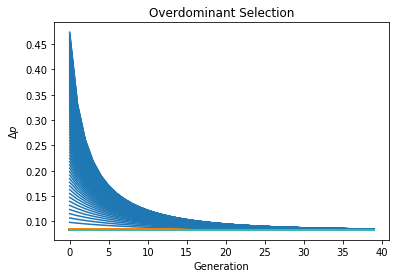

In [680]:
p_init = numpy.arange(0.1, 0.9, 0.01)

sim_delta_p = wf_sim_sel(p_init = p_init, n_sim = 10, t = 40, W_AA = 0, W_Aa = 1.1, W_aa = 1) 

#Plot allele populations over time
plt.plot(numpy.array(sim_delta_p).T)
plt.title("Overdominant Selection")
plt.xlabel("Generation")
plt.ylabel("$\Delta p$")
plt.show()

**Underdominance**

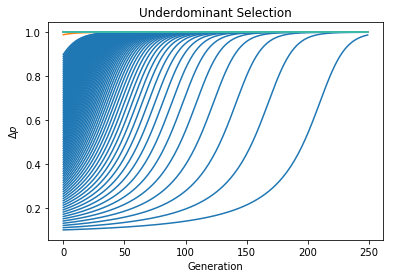

In [679]:
p_init = numpy.arange(0.1, 0.9, 0.01)

sim_delta_p = wf_sim_sel(p_init = p_init, n_sim = 10, t = 250, W_AA = 1.1, W_Aa = 0.99, W_aa = 1) 

#Plot allele populations over time
plt.plot(numpy.array(sim_delta_p).T)
plt.title("Underdominant Selection")
plt.xlabel("Generation")
plt.ylabel("$\Delta p$")
plt.show()

In [14]:
further explanations needed!!!!

SyntaxError: invalid syntax (<ipython-input-14-5e97de2d9864>, line 1)

## Question 4

### Part (a)

Consider $\mu(1 - p)$ to be the probability of choosing an a allele and mutating it, and $\mu p$ to be the probability of choosing an A allele and mutating it.

Let $p(1+s)$ be the selection propogated from the previous generation.

This gives us
$$p' = p(1 + s) + \mu(1 - p) - \mu p$$

Because $p' = p$ at equilibrium,
$$p = p(1 + s) + \mu(1 - p) - \mu p$$

Step 1
$$p = p + ps + \mu - 2p\mu$$

Step 2
$$0 = p(s - 2\mu) + \mu$$

Step 3
$$p = \frac{\mu}{-s + 2\mu}$$


In [15]:
#Simulation Function
def wf_sim_mut(n, p_init, n_sim, t, mu, w):
    simulations = []
    equilibrium = []
    for s in range(n_sim):
        total_n_A = []
        fixated = False
        p = p_init
        for i in range(t):
            curr_n_A = numpy.random.binomial(n, p)
            curr_n_A = curr_n_A + numpy.random.binomial(n - curr_n_A, mu) - numpy.random.binomial(curr_n_A, mu) 
            total_n_A.append(curr_n_A)
            p = curr_n_A/n
        if (curr_n_A > 0) & (curr_n_A < n): equilibrium.append(curr_n_A)
        simulations.append(total_n_A)
    return(simulations, equilibrium)


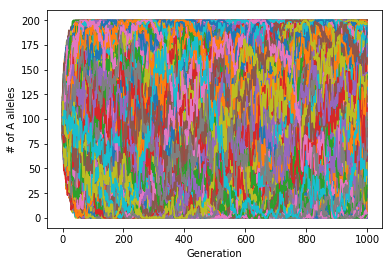

In [21]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 100*2, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [19]:
numpy.mean(equilibrium)

104.17653631284917

### Part (b)

How does the equilibrium change if the population is $N = 10000$? 

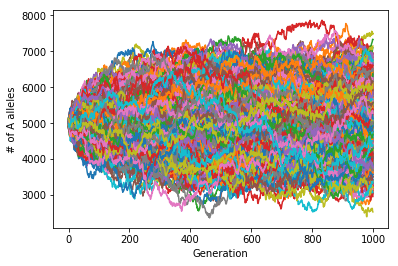

In [22]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [23]:
numpy.mean(equilibrium)

5009.211

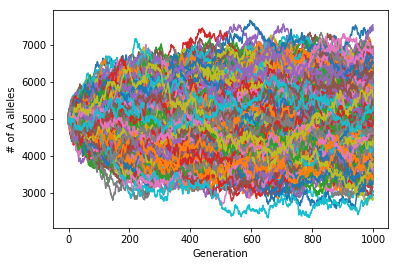

In [32]:
#Run mu = 0.001, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [33]:
numpy.mean(equilibrium)

5008.682

How does the equilibrium change with mutation rate $\mu$ and fitness $w$? 

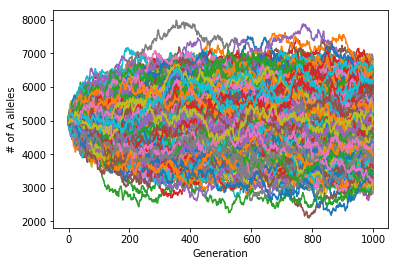

In [35]:
#Run mu = 0.001, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1.05)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [36]:
numpy.mean(equilibrium)

4923.095

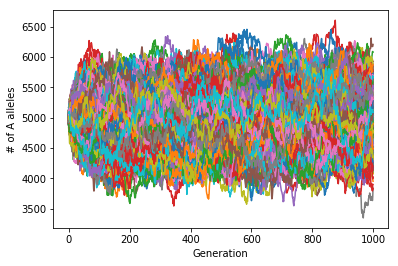

In [37]:
#Run mu = 0.005, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.005, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [38]:
numpy.mean(equilibrium)

4980.416

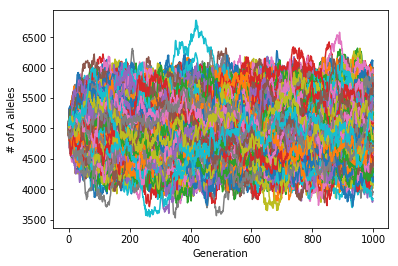

In [39]:
#Run mu = 0.005, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.005, w = 1.05)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [40]:
numpy.mean(equilibrium)

4992.599

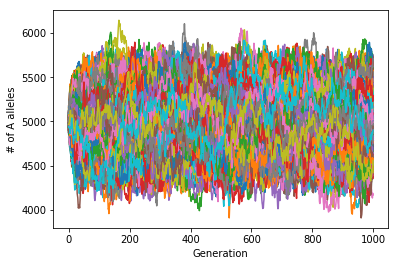

In [41]:
#Run mu = 0.01, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.01, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [42]:
numpy.mean(equilibrium)

5008.247

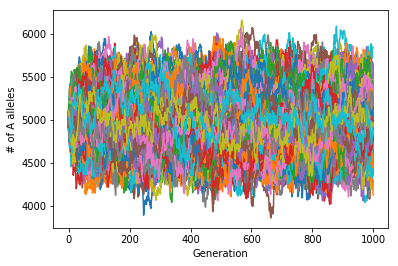

In [43]:
#Run mu = 0.01, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.01, w = 1.05)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [44]:
numpy.mean(equilibrium)

5007.854

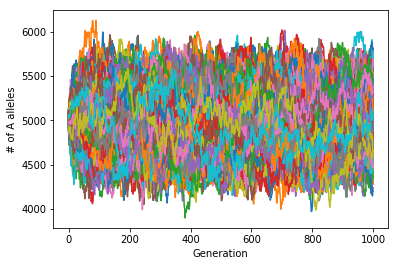

In [47]:
#Run mu = 0.01, w = 1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.01, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [48]:
numpy.mean(equilibrium)

5003.889

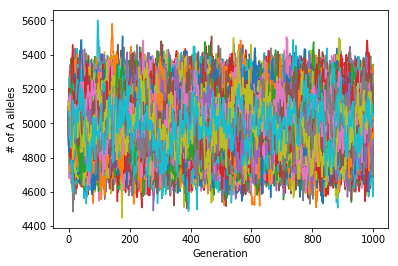

In [49]:
#Run mu = 0.05, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.05, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [50]:
numpy.mean(equilibrium)

4993.498

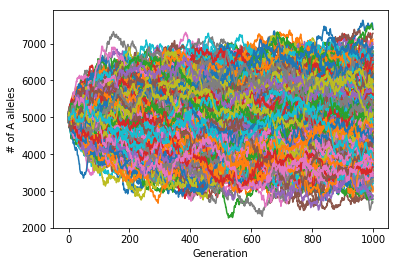

In [51]:
#Run mu = 0.001, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [52]:
numpy.mean(equilibrium)

4986.17

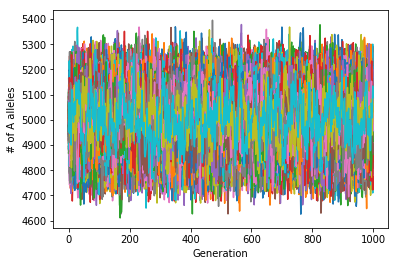

In [53]:
#Run mu = 0.1, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.1, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [54]:
numpy.mean(equilibrium)

5000.379

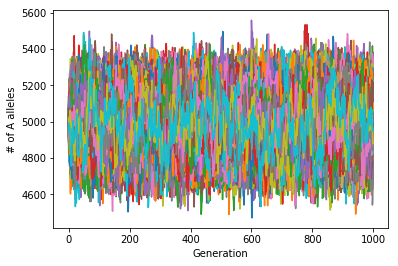

In [56]:
#Run mu = 0.05, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.05, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [57]:
numpy.mean(equilibrium)

5002.195

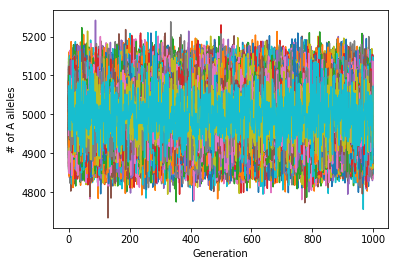

In [58]:
#Run mu = 0.5, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.5, w = 0.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [59]:
numpy.mean(equilibrium)

5001.809

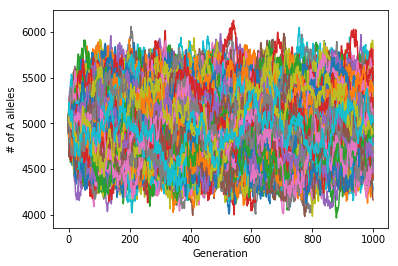

In [60]:
#Run mu = 0.01, w = 1.001
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.01, w = 1.001)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [61]:
numpy.mean(equilibrium)

5004.75

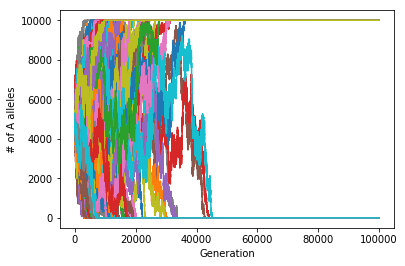

In [62]:
#Run mu = 0, w = 1.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 100, t = 100000, mu = 0, w = 1.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

In [63]:
numpy.mean(equilibrium)

/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

## Question 5

### Part (a)

Let $q = (1 - \mu)^N$ be the probability that an entire population $N$ does not have a mutation.

Let $p = 1 - q = 1 - (1 - \mu)^N$ be the probability that at least one individual in a population of $N$ has a mutation.

The probability that a rare allele A* appears in the population for the first time after the $n$th generation is
$$P(X = k) = (1 - p)^{(k-1)}p$$
This follows a **geometric distribution**

The probability distribution of the frequency of A* when it first appears is a **poisson distribution** with mean $\mu N$.

*(See the following simulations for more details.)*

In [854]:
k_gen = numpy.arange(1, 1000, 10)

def sim_time_to_appear(n, mu, w):
    p = 0
    t_to_appear = 0
    while (p == 0):
        p = p*w + (1 - p)*mu
        p = numpy.random.binomial(n, p)/n
        t_to_appear += 1
    return p*n, t_to_appear

#Frequencies = the probability that a rare allele A appears in the kth generation

def sim_appear(n_sim, n, mu, w, k_gen):
    p_to_appear = []
    times_to_appear = []
    frequencies = []
    for k in k_gen:
        trace = []
        for s in range(n_sim):
            new_p, new_t = sim_time_to_appear(n, mu, w)
            p_to_appear.append(new_p)
            times_to_appear.append(new_t)
            if (new_t == k): trace.append(1)
            else: trace.append(0)
        freq = numpy.sum(trace)/len(trace)
        frequencies.append(freq)
    return p_to_appear, times_to_appear, frequencies


In [861]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 100, mu = 0.01, w = 1.01, n_sim = 1000, k_gen = k_gen)

In [862]:
numpy.mean(times_to_appear)

1.57627

In [863]:
numpy.mean(p_to_appear)

1.5787

In [864]:
numpy.mean(frequencies)

0.00634

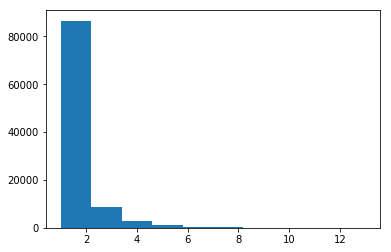

In [865]:
plt.hist(numpy.array(times_to_appear).T)
plt.show()

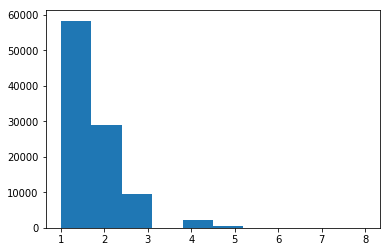

In [866]:
plt.hist(numpy.array(p_to_appear).T)
plt.show()

In [867]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 1000, mu = 0.01, w = 1.01, n_sim = 1000, k_gen = k_gen)

In [868]:
numpy.mean(times_to_appear)

1.00003

In [869]:
numpy.mean(p_to_appear)

9.98549

In [870]:
numpy.mean(frequencies)

0.01

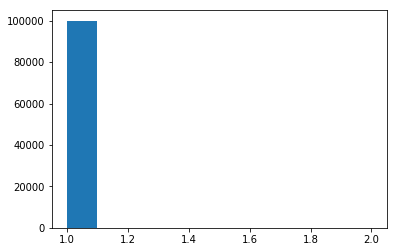

In [871]:
plt.hist(numpy.array(times_to_appear).T)
plt.show()

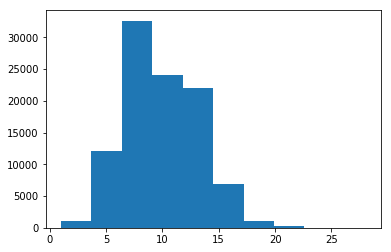

In [872]:
plt.hist(numpy.array(p_to_appear).T)
plt.show()

In [873]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 10, mu = 0.1, w = 1.01, n_sim = 1000, k_gen = k_gen)

In [874]:
numpy.mean(times_to_appear)

1.53587

In [875]:
numpy.mean(p_to_appear)

1.53872

In [876]:
numpy.mean(frequencies)

0.00639

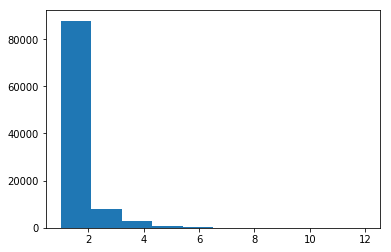

In [877]:
plt.hist(numpy.array(times_to_appear).T)
plt.show()

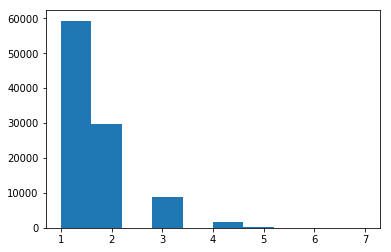

In [878]:
plt.hist(numpy.array(p_to_appear).T)
plt.show()

In [879]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 100, mu = 0.1, w = 1.01, n_sim = 1000, k_gen = k_gen)

In [880]:
numpy.mean(times_to_appear)

1.00004

In [881]:
numpy.mean(p_to_appear)

10.00266

In [882]:
numpy.mean(frequencies)

0.01

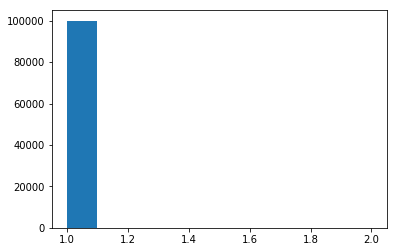

In [883]:
plt.hist(numpy.array(times_to_appear).T)
plt.show()

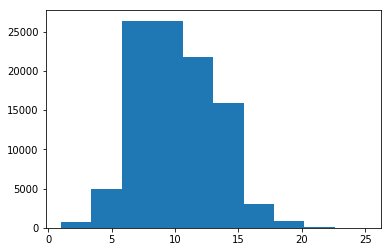

In [884]:
plt.hist(numpy.array(p_to_appear).T)
plt.show()

In [885]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 1000, mu = 0.1, w = 1.01, n_sim = 1000, k_gen = k_gen)

In [886]:
numpy.mean(times_to_appear)

1.0

In [887]:
numpy.mean(p_to_appear)

99.96652

In [888]:
numpy.mean(frequencies)

0.01

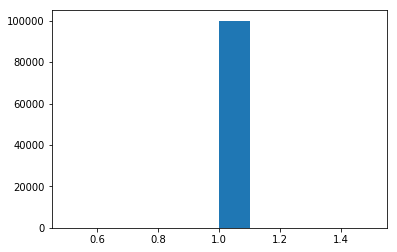

In [889]:
plt.hist(numpy.array(times_to_appear).T)
plt.show()

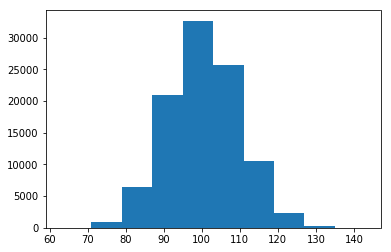

In [890]:
plt.hist(numpy.array(p_to_appear).T)
plt.show()

### Part (b)

As demonstrated in part (a), the expected number of generations for allele A* to emerge is
$$E(X) = \frac{1}{p}$$
where $p = 1 - (1 - \mu)^N$

Also, the average frequency $\widetilde{p} = \mu = \frac{\lambda}{N}$

Now, assuming that there is no fitness advantage (i.e. $s = 0$), the probability that A* fixes after the first time it appears in the population can be demonstrated in the simulations below:

In [1018]:
#Simulation Function
def wf_sim_emerg(n, n_sim, w, mu):
    simulations = []
    times_to_fixation = [] #Reach N
    total_fix = [] #Reach 0 or N
    for s in range(n_sim):
        total_n_A = []
        fixated = False
        p = 0
        i = 1
        while (p <= 0):
            p = numpy.random.poisson(mu*n)/n
        while (fixated == False):
            p = p*w + (1 - p)*mu
            if (p > 1): curr_n_A = numpy.random.binomial(n, 1)
            else: curr_n_A = numpy.random.binomial(n, p)
            total_n_A.append(curr_n_A)
            p = curr_n_A/n
            if (p == 1) and (fixated == False): 
                times_to_fixation.append(i)
                total_fix.append(i)
                fixated = True
                break
            if (p == 0) and (fixated == False): 
                total_fix.append(i)
                fixated = True
                break
            i += 1
        simulations.append(total_n_A)
    return simulations, times_to_fixation, total_fix
        

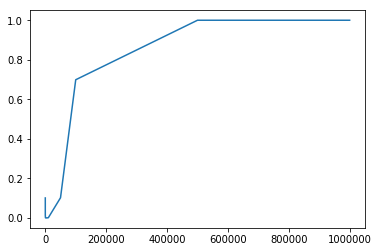

In [1019]:
n = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

prob_fix = []
for n_pop in n:    
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.00001)
    if (len(total_fix) != 0): prob_fix.append(len(times_to_fixation)/len(total_fix))

plt.plot(n, numpy.array(prob_fix).T)
plt.show()

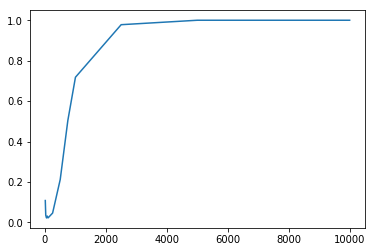

In [1024]:
n = [10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]

prob_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.001)
    if (len(total_fix) != 0): prob_fix.append(len(times_to_fixation)/len(total_fix))
    
plt.plot(n, numpy.array(prob_fix).T)
plt.show()

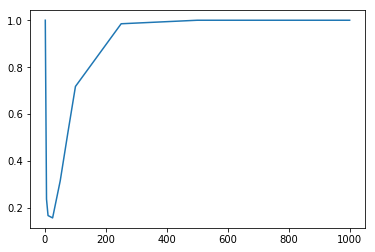

In [1025]:
n = [1, 5, 10, 25, 50, 75, 100, 250, 500, 750, 1000]

prob_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.01)
    if (len(total_fix) != 0): prob_fix.append(len(times_to_fixation)/len(total_fix))
    
plt.plot(n, numpy.array(prob_fix).T)
plt.show()

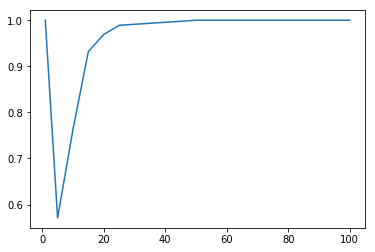

In [1026]:
n = [1, 5, 10, 15, 20, 25, 50, 75, 100]

prob_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.1)
    if (len(total_fix) != 0): prob_fix.append(len(times_to_fixation)/len(total_fix))
    
plt.plot(n, numpy.array(prob_fix).T)
plt.show()

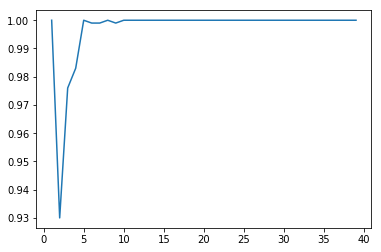

In [1027]:
n = numpy.arange(1, 40)

prob_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.5)
    if (len(total_fix) != 0): prob_fix.append(len(times_to_fixation)/len(total_fix))
    
plt.plot(n, numpy.array(prob_fix).T)
plt.show()

### Part (c)

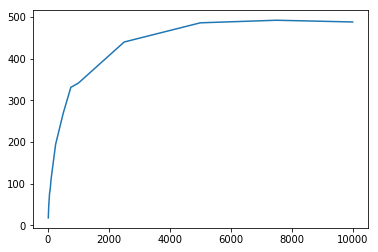

In [1028]:
n = [10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.01, mu = 0.0001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.show()

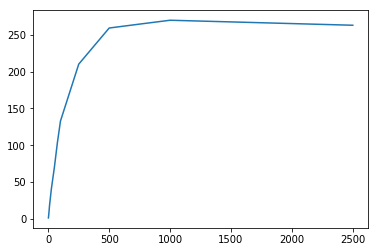

In [1037]:
n = [1, 5, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.01, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.show()

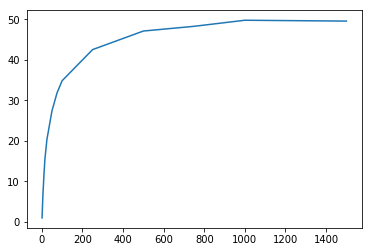

In [1041]:
n = [1, 5, 10, 15, 25, 50, 75, 100, 250, 500, 750, 1000, 1500]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.1, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.show()

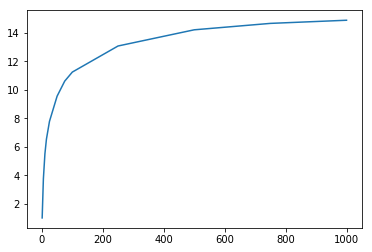

In [1043]:
n = [1, 5, 10, 15, 25, 50, 75, 100, 250, 500, 750, 1000]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.5, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.show()

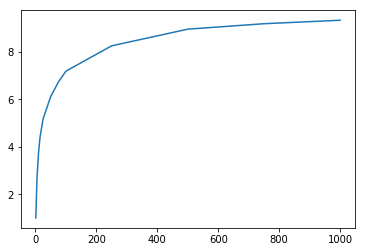

In [1045]:
n = [1, 5, 10, 15, 25, 50, 75, 100, 250, 500, 750, 1000]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 2, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.show()

In [1033]:
#Run w = 1.05
simulations, times_to_fixation, total_fix = wf_sim_emerg(n = 1000, n_sim = 1000, w = 1.1, mu = 0.001)

numpy.mean(times_to_fixation)

49.49384236453202

In [1034]:
#Run w = 1.5
simulations, times_to_fixation, total_fix = wf_sim_emerg(n = 1000, n_sim = 1000, w = 1.5, mu = 0.001)

numpy.mean(times_to_fixation)

14.83804347826087

In [1035]:
#Run w = 2
simulations, times_to_fixation, total_fix = wf_sim_emerg(n = 1000, n_sim = 1000, w = 2, mu = 0.001)

numpy.mean(times_to_fixation)

9.400207900207901